# Домашнее задание 4 - Непараметрические критерии


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import (
    norm,
    binom,
    probplot,
    kstest,
    shapiro,
    ks_2samp,
    wilcoxon,
    ttest_ind,
    mannwhitneyu,
)
from statsmodels.stats.descriptivestats import sign_test
from tqdm import tqdm

## Задача 1 (5 баллов)




1.   Сгенерить самостоятельно 2 распределения, нормальное с любыми параметрами и размером 1000 и биномиальное с параметрами 1, 0.5 и размером 100





















In [2]:
norm_dist = norm(loc=10, scale=5).rvs(1000)
binom_dist = binom(n=1, p=0.5).rvs(100)

2.   Для каждого распределения  
    *   Построить Q-Q plot  
    *   Проверить нормальность с помощью критерия согласия Колмогорова  
    *   Проверить нормальность с помощью критерия Шапиро-Уилка  
    *   Проверить то что ваши распределения имееют общее распределение с помощью критерия однородности Смирнова


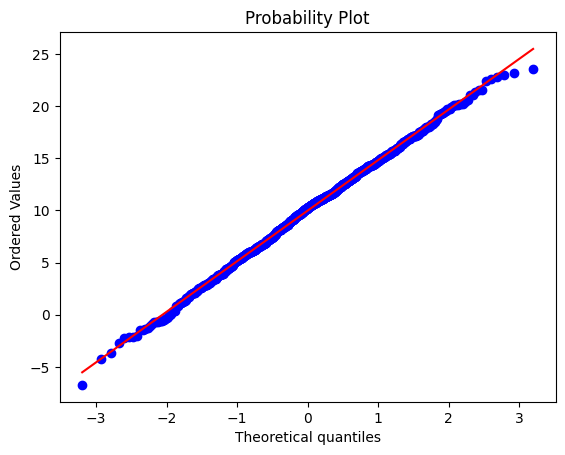

In [3]:
probplot(norm_dist, dist="norm", plot=plt)

plt.show()

In [4]:
norm_kstest = kstest(norm_dist, "norm", args=(np.mean(norm_dist), np.std(norm_dist)))

print(norm_kstest)

print(
    "Распределение соответствует нормальному распределению т.к. статистика Колмогорова стремится к 0"
)

KstestResult(statistic=np.float64(0.026130511136896573), pvalue=np.float64(0.49378998129704643), statistic_location=np.float64(10.311226749666341), statistic_sign=np.int8(-1))
Распределение соответствует нормальному распределению т.к. статистика Колмогорова стремится к 0


In [5]:
norm_shapiro = shapiro(norm_dist)

print(norm_shapiro)

print(
    "Распределение соответствует нормальному распределению т.к. статистика Шапиро-Уилка стремится к 1"
)

ShapiroResult(statistic=np.float64(0.9985434555506669), pvalue=np.float64(0.5832384889745826))
Распределение соответствует нормальному распределению т.к. статистика Шапиро-Уилка стремится к 1


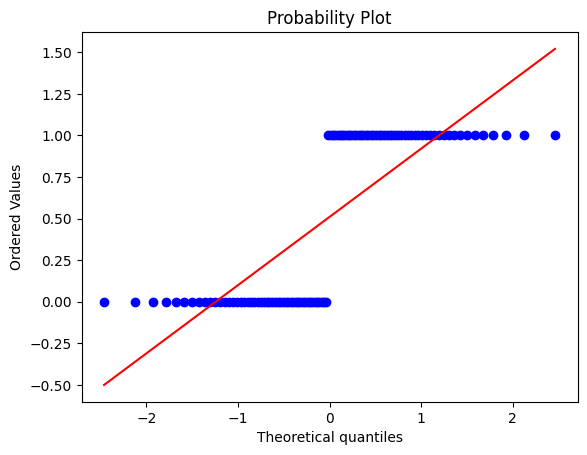

In [6]:
probplot(binom_dist, dist="norm", plot=plt)

plt.show()

In [7]:
binom_kstest = kstest(
    binom_dist, "norm", args=(np.mean(binom_dist), np.std(binom_dist))
)

print(binom_kstest)

print(
    "Биномиальное распределение не соответствует нормальному распределению т.к. статистика Колмогорова стремится к 0.5"
)


KstestResult(statistic=np.float64(0.3465053252009924), pvalue=np.float64(3.1288238611915653e-11), statistic_location=np.int64(1), statistic_sign=np.int8(-1))
Биномиальное распределение не соответствует нормальному распределению т.к. статистика Колмогорова стремится к 0.5


In [8]:
binom_shapiro = shapiro(binom_dist)

print(binom_shapiro)

print(
    "Биномиальное распределение не соответствует нормальному распределениют.к. статистика Шапиро-Уилка стремится к 0.5"
)

ShapiroResult(statistic=np.float64(0.6362559168214541), pvalue=np.float64(2.2184399092508074e-14))
Биномиальное распределение не соответствует нормальному распределениют.к. статистика Шапиро-Уилка стремится к 0.5


In [9]:
dist_ks_2samp = ks_2samp(norm_dist, binom_dist)

print(dist_ks_2samp)

print(
    "Биномиальное распределение не соответствует нормальному распределению т.к. статистика критерия однородности Смирнова стремится к 1"
)

KstestResult(statistic=np.float64(0.967), pvalue=np.float64(2.5800578633877477e-113), statistic_location=np.float64(1.0), statistic_sign=np.int8(-1))
Биномиальное распределение не соответствует нормальному распределению т.к. статистика критерия однородности Смирнова стремится к 1


3.   Собрать новую выборку из ваших 2 сгенирированных распределений. Для этого взять случайных 900 элементов из нормального распределения и добавить к ним выборку с биномиальным распределением, чтобы снова получили выборки из 1000 элементов

In [10]:
random_idx = np.random.choice(1000, 900, replace=False)
norm_sample = norm_dist[random_idx]

combined_dist = np.concatenate((norm_sample, binom_dist))

4.   Для новой "собранной выборки"  
    *   Построить Q-Q plot  
    *   Проверить нормальность с помощью критерия согласия Колмогорова  
    *   Проверить нормальность с помощью критерия Шапиро-Уилка

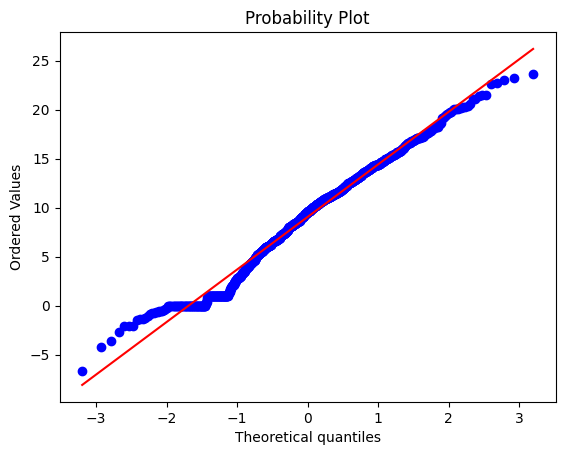

In [11]:
probplot(combined_dist, dist="norm", plot=plt)

plt.show()

In [12]:
combined_kstest = kstest(
    combined_dist, "norm", args=(np.mean(combined_dist), np.std(combined_dist))
)

print(combined_kstest)

print("Данные нельзя назвать нормальными т.к. р-значение Колмогорова стремится к 0")

KstestResult(statistic=np.float64(0.06144243866818992), pvalue=np.float64(0.0010048962532356665), statistic_location=np.float64(1.038343468717887), statistic_sign=np.int8(1))
Данные нельзя назвать нормальными т.к. р-значение Колмогорова стремится к 0


In [13]:
combined_shapiro = shapiro(combined_dist)

print(combined_shapiro)

print("Статистики говорят, что данные можно назвать нормальными")

ShapiroResult(statistic=np.float64(0.9856378327325871), pvalue=np.float64(2.418863842350725e-08))
Статистики говорят, что данные можно назвать нормальными


5.  Из выборки с нормальным распределением получить новую выборку. Сделаем это с помощью "докидывания эффекта". Взять текущую выборку с нормальным распределением и рандомные 500 элементов увеличить на 5%, остальные оставим без изменений

In [14]:
random_idx = np.random.choice(1000, 500, replace=False)
norm_dist_5 = norm_dist.copy()

norm_dist_5[random_idx] = norm_dist_5[random_idx] * 1.05

6. Для новой выборки с "докинутым эффектом"
    *   Построить Q-Q plot
    *   Проверить нормальность с помощью критерия согласия Колмогорова
    *   Проверить нормальность с помощью критерия Шапиро-Уилка
    *   Проверить то что ваши распределения (изначальное нормальное из п1 и полученное в п5) имееют общее распределение с помощью критерия однородности Смирнова

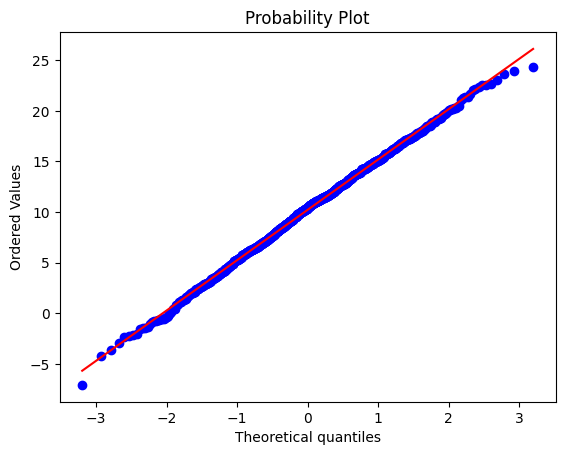

In [15]:
probplot(norm_dist_5, dist="norm", plot=plt)

plt.show()

In [16]:
norm_kstest_new = kstest(
    norm_dist_5, "norm", args=(np.mean(norm_dist_5), np.std(norm_dist_5))
)

print(norm_kstest_new)

print(
    "Распределение соответствует нормальному распределению т.к. статистика Колмогорова стремится к 0"
)

KstestResult(statistic=np.float64(0.024323854178396664), pvalue=np.float64(0.5863127455748092), statistic_location=np.float64(10.828638242403434), statistic_sign=np.int8(-1))
Распределение соответствует нормальному распределению т.к. статистика Колмогорова стремится к 0


In [17]:
norm_shapiro_new = shapiro(norm_dist_5)

print(norm_shapiro_new)

print(
    "Распределение соответствует нормальному распределению т.к. статистика Шапиро-Уилка стремится к 1"
)

ShapiroResult(statistic=np.float64(0.9987321345745614), pvalue=np.float64(0.7101229830763207))
Распределение соответствует нормальному распределению т.к. статистика Шапиро-Уилка стремится к 1


In [18]:
dist_new_ks_2samp = ks_2samp(norm_dist, norm_dist_5)

print(dist_new_ks_2samp)

print(
    "Биномиальное распределение не соответствует нормальному распределению т.к. р-значение критерия однородности Смирнова стремится к 1"
)

KstestResult(statistic=np.float64(0.028), pvalue=np.float64(0.8282194040312439), statistic_location=np.float64(11.18368013770548), statistic_sign=np.int8(1))
Биномиальное распределение не соответствует нормальному распределению т.к. р-значение критерия однородности Смирнова стремится к 1


## Задача 2 (4 балла)

Для данных из файла employees.xls постройте гистограмму для переменной SALARY. Проверьте нормальность этих данных с помощью:
  * Q-Q plot
  * Критерия Колмогорова
  * Критерия Шапиро-Уилка


In [19]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/employees.xls >> employees.xls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100 26624  100 26624    0     0  67021      0 --:--:-- --:--:-- --:--:-- 66894


In [20]:
df = pd.read_excel("employees.xls")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  100 non-null    object
 1   GENDER      100 non-null    object
 2   DEPART      100 non-null    object
 3   EDUC        100 non-null    object
 4   AGE         100 non-null    int64 
 5   HEIGHT      100 non-null    int64 
 6   SENIOR      100 non-null    int64 
 7   SALARY      100 non-null    int64 
 8   INI_PROF    100 non-null    int64 
 9   CUR_PROF    100 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 7.9+ KB


In [21]:
df.head()

,Unnamed: 0,GENDER,DEPART,EDUC,AGE,HEIGHT,SENIOR,SALARY,INI_PROF,CUR_PROF
0,Alexander,Female,Ship,College,22,63,4,23400,82,90
1,Arcones,Male,Package,College,49,65,17,40400,89,123
2,Barber,Male,Bake,College,36,67,8,29400,77,93
3,Barrera,Male,Package,HS,37,67,3,24800,102,108
4,Bester,Male,Ship,Grad,43,66,11,31200,82,104


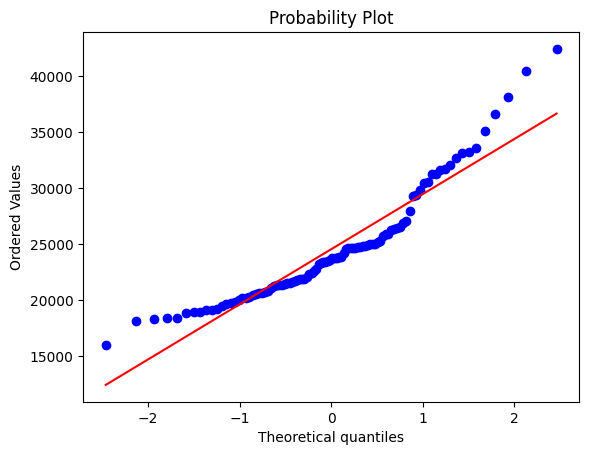

In [22]:
salary = df["SALARY"]

probplot(salary, dist="norm", plot=plt)

plt.show()

In [23]:
salary_kstest = kstest(salary, "norm", args=(np.mean(salary), np.std(salary)))

print(salary_kstest)

print("Данные нельзя назвать нормальными т.к. р-значение Колмогорова стремится к 0")

KstestResult(statistic=np.float64(0.152518581459004), pvalue=np.float64(0.016985059239319866), statistic_location=np.int64(25000), statistic_sign=np.int8(1))
Данные нельзя назвать нормальными т.к. р-значение Колмогорова стремится к 0


In [24]:
salary_shapiro = shapiro(salary)

print(salary_shapiro)

print(
    "Распределение соответствует нормальному распределению т.к. статистика Шапиро-Уилка стремится к 1"
)

ShapiroResult(statistic=np.float64(0.9015022004875934), pvalue=np.float64(1.664645028598051e-06))
Распределение соответствует нормальному распределению т.к. статистика Шапиро-Уилка стремится к 1


## Задача 3 (3 балла)

Для данных из файла employees.xls проверить с помощью критерия знаков и рангового критерия гипотезу что медианная зарплата равна 25000

In [25]:
median_salary = 25000

_, pvalue = sign_test(salary, mu0=median_salary)

print(round(pvalue, 5))

print("p-значение ниже 0.05, значит гипотеза о медианной зарплате в 25000 отвергается")

0.00049
p-значение ниже 0.05, значит гипотеза о медианной зарплате в 25000 отвергается


In [26]:
salary_wilcoxon = wilcoxon(salary - median_salary)

print(salary_wilcoxon)

print("p-значение ниже 0.05, значит гипотеза о медианной зарплате в 25000 отвергается")

WilcoxonResult(statistic=np.float64(1809.5), pvalue=np.float64(0.04131952571720401))
p-значение ниже 0.05, значит гипотеза о медианной зарплате в 25000 отвергается


## Задача 4 (3 балла)

В файле anorexia.txt записан вес пациентов до и после начала терапии от анорексии. С помощью критерия знаков и рангового критерия проверить, была ли эффективна данная терапия

In [27]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/anorexia.txt >> anorexia.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   355  100   355    0     0   1196      0 --:--:-- --:--:-- --:--:--  1199


In [28]:
df = pd.read_csv("anorexia.txt", sep="\t")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Before  29 non-null     float64
 1   After   29 non-null     float64
dtypes: float64(2)
memory usage: 596.0 bytes


In [29]:
df.head()

,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4


In [30]:
_, pvalue = sign_test(df["After"] - df["Before"])

print(round(pvalue, 5))


print("p-значение выше 0,05, значит эффекта от терапии нет")

0.26493
p-значение выше 0,05, значит эффекта от терапии нет


In [31]:
ter_wilcoxon = wilcoxon(df["After"], df["Before"])

print(ter_wilcoxon)

print("p-значение выше 0,05, значит эффекта от терапии нет")

WilcoxonResult(statistic=np.float64(131.5), pvalue=np.float64(0.06551516801118851))
p-значение выше 0,05, значит эффекта от терапии нет


## Задача 5 (3 балла)

В файле seattle.txt записаны цены на объекты недвижимости в одном районе из районов Сиетла в 2001 и 2002 году (объекты выбирались случайно). Изменились ли средние цены в этом районе за год? Проверить это с помощью критерия знаков и рангового критерия

In [32]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/seattle.txt >> seattle.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   996  100   996    0     0   3555      0 --:--:-- --:--:-- --:--:--  3557


In [33]:
df = pd.read_csv("seattle.txt", sep="\t")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   100 non-null    float64
 1   Year    100 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [34]:
df.head()

,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002


In [35]:
price_2001 = df[df["Year"] == 2001]["Price"].reset_index().drop("index", axis=1)
price_2002 = df[df["Year"] == 2002]["Price"].reset_index().drop("index", axis=1)

In [36]:
_, pvalue = sign_test(price_2002 - price_2001)

print(round(pvalue, 5))

print("p-значение выше 0,05, значит цены не изменились")

0.88772
p-значение выше 0,05, значит цены не изменились


In [37]:
price_wilcoxon = wilcoxon(price_2002, price_2001)

print(price_wilcoxon)

print("p-значение выше 0,05, значит цены не изменились")

WilcoxonResult(statistic=array([612.]), pvalue=array([0.81094028]))
p-значение выше 0,05, значит цены не изменились


## Задача 6 (3 балла)

В рамках исследования эффективности лекарства
пациенты с синдромом дефицита внимания и гиперактивностью в течение недели принимали либо лекарство, либо плацебо. В конце недели каждый пациент проходил тест на способность к подавлению импульсивных поведенческих реакций. Был ли эффект от применения лекарства? Данные находятся в файле methylphenidate.txt.

In [38]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/methylphenidate.txt >> methylphenidate.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   168  100   168    0     0    451      0 --:--:-- --:--:-- --:--:--   451


In [39]:
df = pd.read_csv("methylphenidate.txt", sep=" ")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Placebo          24 non-null     int64
 1   Methylphenidate  24 non-null     int64
dtypes: int64(2)
memory usage: 516.0 bytes


In [40]:
df.head()

,Placebo,Methylphenidate
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


In [41]:
_, pvalue = sign_test(df["Placebo"] - df["Methylphenidate"])

print(round(pvalue, 5))

print("p-значение выше 0.05, значит эффекта нет")

0.06391
p-значение выше 0.05, значит эффекта нет


In [42]:
test_wilcoxon = wilcoxon(df["Placebo"], df["Methylphenidate"])

print(test_wilcoxon)

print("p-значение ниже 0.05, значит эффект есть")

WilcoxonResult(statistic=np.float64(48.5), pvalue=np.float64(0.002814650535583496))
p-значение ниже 0.05, значит эффект есть


## Задача 7 (2 балла)


1.   Сгенерировать выборки с нормальным распределением без выбросов, докинуть эффект на одну из них равномерно и с помощью распределения

Примечание:
- Бутстреп считать минимум на 1000 итераций
- Для докидывания эффекта с помощью распределения возьмите распределение из stats, параметры задаются исходя из параметров изначального вектора и желаемого эффекта


In [43]:
norm_dist_1 = np.random.normal(loc=0, scale=5, size=1000)

norm_dist_2 = np.random.normal(loc=0, scale=5, size=1000)

norm_dist_2 = norm_dist_2 * 1.1

effect = norm.rvs(loc=0.5, scale=0.1, size=1000)

norm_dist_2_effect = norm_dist_2 + effect

2.   То же, что и в п1, но выборки с выбросами сделать


In [44]:
norm_dist_3 = np.random.normal(loc=0, scale=5, size=1000)

norm_dist_4 = np.random.normal(loc=0, scale=5, size=1000)

outliers_1 = np.random.choice(1000, 50, replace=False)
outliers_2 = np.random.choice(1000, 50, replace=False)

# Генерируем выбросы
norm_dist_3[outliers_1] = np.random.normal(loc=0 + 10, scale=5, size=50)
norm_dist_4[outliers_2] = np.random.normal(loc=0 + 10, scale=5, size=50)

norm_dist_4 = norm_dist_3 * 1.1

effect = norm.rvs(loc=0.5, scale=0.1, size=1000)

norm_dist_4_effect = norm_dist_2 + effect

3.   Для случаев из п1 и п2 бутстрэпом оценить: среднее, медиану, 25% перцентиль, построить доверительные интервалы для статистик (речь о разницах средних/медиан/перцентилей для групп)

In [45]:
def get_bootstrap_array(arr):
    return np.random.choice(arr, replace=True, size=len(arr))


def calc_bootstrap_mean(arr, size=1000):
    result = np.empty(size)
    for i in range(size):
        result[i] = np.mean(get_bootstrap_array(arr))
    return result


def calc_bootstrap_median(arr, size=1000):
    result = np.empty(size)
    for i in range(size):
        result[i] = np.median(get_bootstrap_array(arr))
    return result


def calc_bootstrap_quantile(arr, size=1000):
    result = np.empty(size)
    for i in range(size):
        result[i] = np.quantile(get_bootstrap_array(arr), q=0.25)
    return result

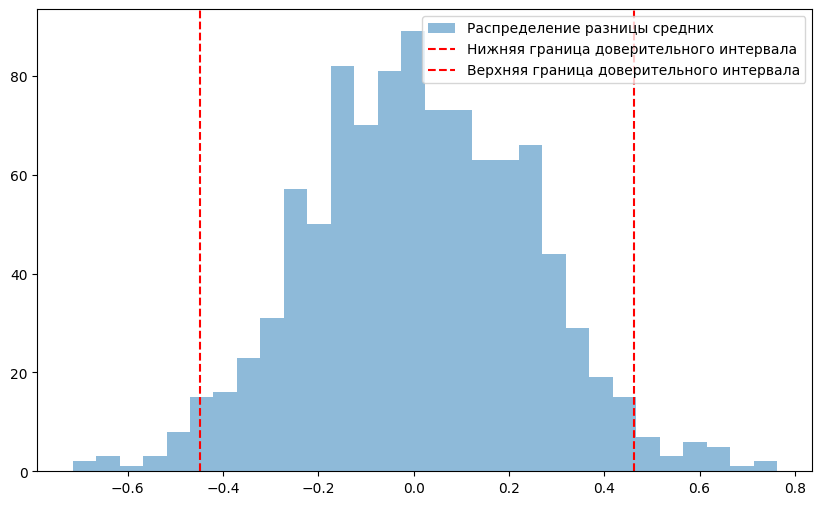

In [46]:
sample_2_means = calc_bootstrap_mean(norm_dist_2_effect, size=1000)
sample_4_means = calc_bootstrap_mean(norm_dist_4_effect, size=1000)

mean_diffs = np.array(sample_4_means) - np.array(sample_2_means)

lower_bound = np.percentile(mean_diffs, (0.05 / 2) * 100)
upper_bound = np.percentile(mean_diffs, (1 - 0.05 / 2) * 100)

plt.figure(figsize=(10, 6))

plt.hist(mean_diffs, bins=30, alpha=0.5, label="Распределение разницы средних")

plt.axvline(
    lower_bound,
    color="r",
    linestyle="--",
    label="Нижняя граница доверительного интервала",
)
plt.axvline(
    upper_bound,
    color="r",
    linestyle="--",
    label="Верхняя граница доверительного интервала",
)
plt.legend(loc="upper right")

plt.show()

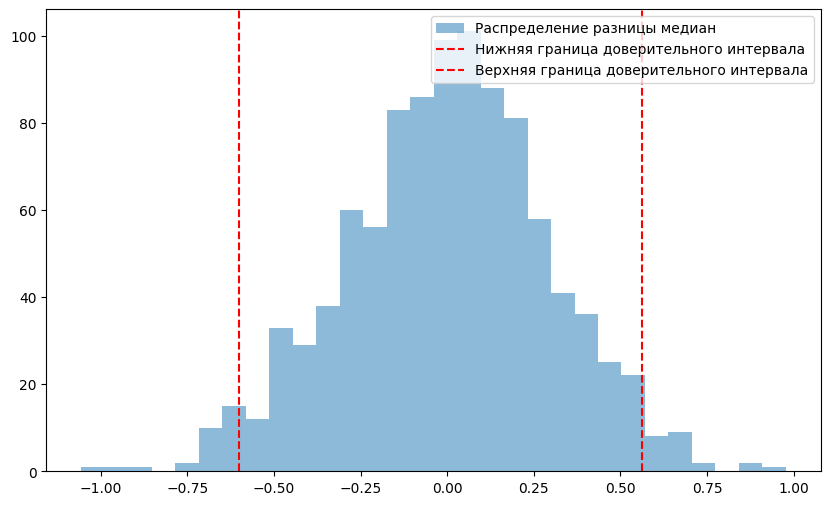

In [47]:
sample_2_medians = calc_bootstrap_median(norm_dist_2_effect, size=1000)
sample_4_medians = calc_bootstrap_median(norm_dist_4_effect, size=1000)

median_diffs = np.array(sample_4_medians) - np.array(sample_2_medians)

lower_bound = np.percentile(median_diffs, (0.05 / 2) * 100)
upper_bound = np.percentile(median_diffs, (1 - 0.05 / 2) * 100)

plt.figure(figsize=(10, 6))

plt.hist(median_diffs, bins=30, alpha=0.5, label="Распределение разницы медиан")

plt.axvline(
    lower_bound,
    color="r",
    linestyle="--",
    label="Нижняя граница доверительного интервала",
)
plt.axvline(
    upper_bound,
    color="r",
    linestyle="--",
    label="Верхняя граница доверительного интервала",
)
plt.legend(loc="upper right")

plt.show()

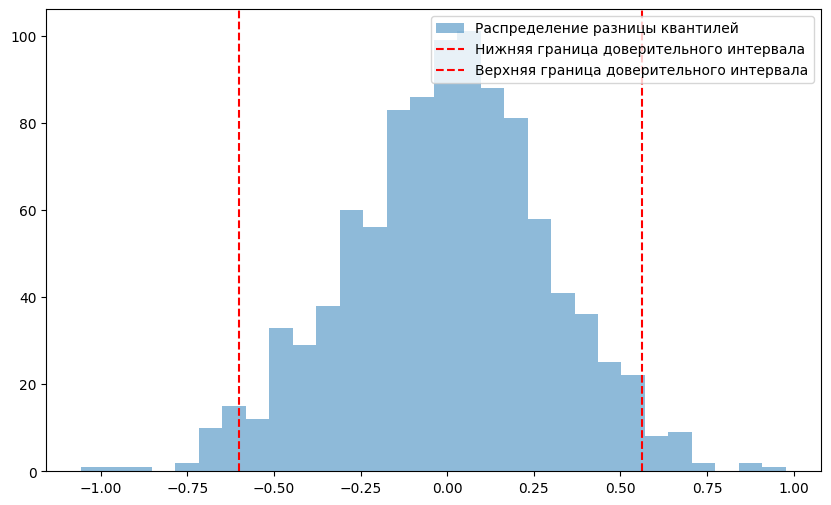

In [48]:
sample_2_quantiles = calc_bootstrap_quantile(norm_dist_2_effect, size=1000)
sample_4_quantiles = calc_bootstrap_quantile(norm_dist_4_effect, size=1000)

median_diffs = np.array(sample_4_medians) - np.array(sample_2_medians)

lower_bound = np.percentile(median_diffs, (0.05 / 2) * 100)
upper_bound = np.percentile(median_diffs, (1 - 0.05 / 2) * 100)

plt.figure(figsize=(10, 6))

plt.hist(median_diffs, bins=30, alpha=0.5, label="Распределение разницы квантилей")

plt.axvline(
    lower_bound,
    color="r",
    linestyle="--",
    label="Нижняя граница доверительного интервала",
)
plt.axvline(
    upper_bound,
    color="r",
    linestyle="--",
    label="Верхняя граница доверительного интервала",
)
plt.legend(loc="upper right")

plt.show()

4.   Для случаев из п1 и п2 оценить среднее т-тестом и Манном-Уитни. Сравнить с результатами бутстрэпа. Сделать выводы. Сравниваем точечные оценки (на бутстрэпе их тоже считаем)

In [49]:
# t-тест
t_stat, p_value = ttest_ind(norm_dist_2_effect, norm_dist_4_effect)

print(f"t-тест: статистика = {t_stat:.2f}, p-значение = {p_value:.5f}")

t-тест: статистика = -0.03, p-значение = 0.97707


In [50]:
# Тест Манна-Уитни
u_stat, p_value = mannwhitneyu(norm_dist_2_effect, norm_dist_4_effect)

print(f"Тест Манна-Уитни: статистика = {u_stat:.2f}, p-значение = {p_value:.5f}")

Тест Манна-Уитни: статистика = 499583.00, p-значение = 0.97427


In [51]:
print(
    f"Cреднее выборочных средних после бутстрапа для 1-й и 2-й выборок: {np.mean(sample_2_means):.2f} и  {np.mean(sample_4_means):.2f}"
)

print(
    f"Cреднее выборочных медиан после бутстрапа для 1-й и 2-й выборок: {np.mean(sample_2_medians):.2f} и  {np.mean(sample_4_medians):.2f}"
)

print(
    f"Cреднее выборочных квантилей после бутстрапа для 1-й и 2-й выборок: {np.mean(sample_2_quantiles):.2f} и  {np.mean(sample_4_quantiles):.2f}"
)

Cреднее выборочных средних после бутстрапа для 1-й и 2-й выборок: 0.65 и  0.66
Cреднее выборочных медиан после бутстрапа для 1-й и 2-й выборок: 0.52 и  0.52
Cреднее выборочных квантилей после бутстрапа для 1-й и 2-й выборок: -2.85 и  -2.78


In [52]:
print(
    "По результатам t-теста и Манна-Уитни выборки не являются одинаковыми при alpha = 0.01. То же самое подтверждают точечные оценки после бутстрапа."
)

По результатам t-теста и Манна-Уитни выборки не являются одинаковыми при alpha = 0.01. То же самое подтверждают точечные оценки после бутстрапа.


## Задача 8 (2 балла)

Сгенерировать 2 выборки из нормального распределения с 1000 элементов каждая.
- Оцените на этих данных мощность и корректность t-test и Манна-Уитни
- Докиньте выбросы в обе группы и проверьте как изменится мощность и корректность

Для оценки использовать минимум 1000 итераций

In [53]:
norm_dist_1 = np.random.normal(loc=0, scale=5, size=1000)

norm_dist_2 = np.random.normal(loc=0, scale=5, size=1000)

In [54]:
def evaluate_tests(sample1, sample2):
    alpha = 0.01

    t_test_results = []
    mann_whitney_results = []

    for _ in tqdm(range(10000)):
        _, p_value_t = ttest_ind(sample1, sample2)
        t_test_results.append(p_value_t < alpha)

        _, p_value_mw = mannwhitneyu(sample1, sample2, alternative="two-sided")
        mann_whitney_results.append(p_value_mw < alpha)

    power_t_test = np.mean(t_test_results)
    power_mann_whitney = np.mean(mann_whitney_results)

    return power_t_test, power_mann_whitney

In [55]:
power = evaluate_tests(norm_dist_1, norm_dist_2)

print(f"Мощности: t-тест: {power[0]}, Манна-Уитни: {power[1]}")

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:23<00:00, 423.67it/s]

Мощности: t-тест: 0.0, Манна-Уитни: 0.0


In [56]:
outliers_1 = np.random.choice(1000, 50, replace=False)
outliers_2 = np.random.choice(1000, 50, replace=False)

norm_dist_1[outliers_1] = np.random.normal(loc=0, scale=5, size=50)
norm_dist_2[outliers_2] = np.random.normal(loc=0, scale=5, size=50)

In [57]:
power = evaluate_tests(norm_dist_1, norm_dist_2)

print(f"Мощности: t-тест: {power[0]}, Манна-Уитни: {power[1]}")

100%|██████████| 10000/10000 [00:23<00:00, 421.62it/s]

Мощности: t-тест: 0.0, Манна-Уитни: 0.0
